# Import Library

In [1]:
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf

%matplotlib inline

# Load Data

### Download data

In [ ]:
os.remove('anime-recommendation-database-2020.zip')
! kaggle datasets download -d hernan4444/anime-recommendation-database-2020

### Read CSV

In [ ]:
# data source: https://www.kaggle.com/datasets/hernan4444/anime-recommendation-database-2020

path_anime = 'data/anime.csv'
path_animelist_user = 'data/animelist.csv'
path_rating = 'data/rating_complete.csv'
path_status = 'data/watching_status.csv'

anime = pd.read_csv(path_anime)
animelist_user = pd.read_csv(path_animelist_user)
rating = pd.read_csv(path_rating)
status = pd.read_csv(path_status)

# Data Understanding

Macam-macam file yang ada:
- `anime.csv` contain general information of every anime (17.562 different anime) like genre, stats, studio, etc.
- `animelist.csv` have the list of all animes register by the user with the respective score, watching status and numbers of episodes watched. This dataset contains 109 Million row, 17.562 different animes and 325.772 different users.
- `rating_complete.csv` is a subset of animelist.csv. This dataset only considers animes that the user has watched completely (watching_status==2) and gave it a score (score!=0). This dataset contains 57 Million ratings applied to 16.872 animes by 310.059 users.
- `watching_status.csv` describe every possible status of the column: "watching_status" in animelist.csv.

In [ ]:
print('Jumlah data anime: ', len(anime))
print('Jumlah data list anime dengan user: ', len(animelist_user))
print('Jumlah data rating anime: ', len(rating))
print('Jumlah data status user: ', len(status))

Jumlah data anime:  17562
Jumlah data list anime dengan user:  109224747
Jumlah data rating anime:  57633278
Jumlah data status user:  5


### Analisis data pada anime.csv

In [ ]:
anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17562 entries, 0 to 17561
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MAL_ID         17562 non-null  int64 
 1   Name           17562 non-null  object
 2   Score          17562 non-null  object
 3   Genres         17562 non-null  object
 4   English name   17562 non-null  object
 5   Japanese name  17562 non-null  object
 6   Type           17562 non-null  object
 7   Episodes       17562 non-null  object
 8   Aired          17562 non-null  object
 9   Premiered      17562 non-null  object
 10  Producers      17562 non-null  object
 11  Licensors      17562 non-null  object
 12  Studios        17562 non-null  object
 13  Source         17562 non-null  object
 14  Duration       17562 non-null  object
 15  Rating         17562 non-null  object
 16  Ranked         17562 non-null  object
 17  Popularity     17562 non-null  int64 
 18  Members        17562 non-n

In [ ]:
print("Jumlah anime:", len(anime.MAL_ID.unique()))

Jumlah anime: 17562


cek data null

In [ ]:
anime.isnull().sum()

MAL_ID           0
Name             0
Score            0
Genres           0
English name     0
Japanese name    0
Type             0
Episodes         0
Aired            0
Premiered        0
Producers        0
Licensors        0
Studios          0
Source           0
Duration         0
Rating           0
Ranked           0
Popularity       0
Members          0
Favorites        0
Watching         0
Completed        0
On-Hold          0
Dropped          0
Plan to Watch    0
Score-10         0
Score-9          0
Score-8          0
Score-7          0
Score-6          0
Score-5          0
Score-4          0
Score-3          0
Score-2          0
Score-1          0
dtype: int64

cek duplicated data

In [ ]:
anime.duplicated().sum()

0

cek data pada genre anime

In [ ]:
all_genres = []
anime_genres = anime.Genres.unique()

for i, v in enumerate(anime_genres):
  all_genres.extend(v.split(', '))

all_genres = sorted(set(all_genres))

print("Jumlah genre:", len(all_genres))
print("List genre:", all_genres)

Jumlah genre: 44
List genre: ['Action', 'Adventure', 'Cars', 'Comedy', 'Dementia', 'Demons', 'Drama', 'Ecchi', 'Fantasy', 'Game', 'Harem', 'Hentai', 'Historical', 'Horror', 'Josei', 'Kids', 'Magic', 'Martial Arts', 'Mecha', 'Military', 'Music', 'Mystery', 'Parody', 'Police', 'Psychological', 'Romance', 'Samurai', 'School', 'Sci-Fi', 'Seinen', 'Shoujo', 'Shoujo Ai', 'Shounen', 'Shounen Ai', 'Slice of Life', 'Space', 'Sports', 'Super Power', 'Supernatural', 'Thriller', 'Unknown', 'Vampire', 'Yaoi', 'Yuri']


In [ ]:
total_genre_by_anime = {g: 0 for g in all_genres}

for anime_genre in anime['Genres']:
  list_anime_genre = anime_genre.split(', ')
  for genre in list_anime_genre:
    total_genre_by_anime[genre] = total_genre_by_anime[genre] + 1

total_genre_by_anime = dict(sorted(total_genre_by_anime.items(), key=lambda x:x[1], reverse=True))

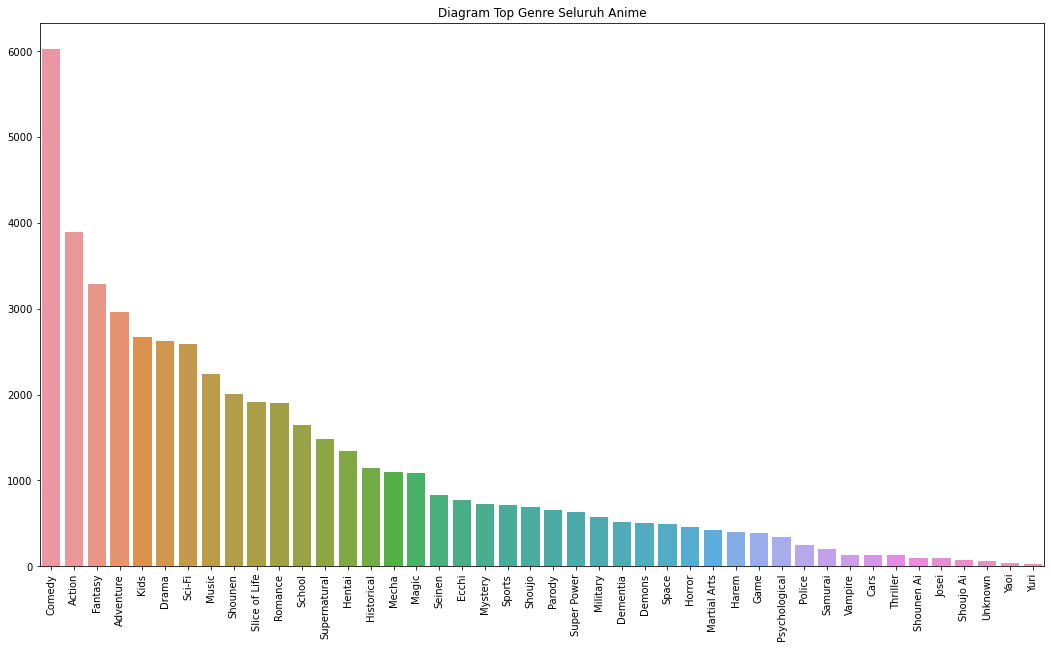

In [ ]:
plt.figure(figsize=(18,10))
sns.barplot(x = list(total_genre_by_anime.keys()),
            y = list(total_genre_by_anime.values()))
plt.xticks(rotation=90)
plt.title("Diagram Top Genre Seluruh Anime")
plt.show()

In [ ]:
# top 10 genre
pd.DataFrame({
    "Genre": list(total_genre_by_anime.keys()),
    "Total": list(total_genre_by_anime.values())
}).head(10)

,Genre,Total
0,Comedy,6029
1,Action,3888
2,Fantasy,3285
3,Adventure,2957
4,Kids,2665
5,Drama,2619
6,Sci-Fi,2583
7,Music,2244
8,Shounen,2003
9,Slice of Life,1914


### Analisis data pada animelist.csv

In [ ]:
animelist_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109224747 entries, 0 to 109224746
Data columns (total 5 columns):
 #   Column            Dtype
---  ------            -----
 0   user_id           int64
 1   anime_id          int64
 2   rating            int64
 3   watching_status   int64
 4   watched_episodes  int64
dtypes: int64(5)
memory usage: 4.1 GB


cek data null

In [ ]:
animelist_user.isnull().sum()

user_id             0
anime_id            0
rating              0
watching_status     0
watched_episodes    0
dtype: int64

cek duplicated data

In [ ]:
animelist_user.duplicated().sum()

1

In [ ]:
print("Jumlah aktivitas user terhadap anime:", len(animelist_user.user_id.unique()))
print("Jumlah anime:", len(animelist_user.anime_id.unique()))

Jumlah aktivitas user terhadap anime: 325770
Jumlah anime: 17562


In [ ]:
sorted(animelist_user.rating.unique())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [ ]:
# top rating
total_rating_user = animelist_user.rating.value_counts()
pd.DataFrame({
    "Rating": list(total_rating_user.keys()),
    "Total": list(total_rating_user)
})

,Rating,Total
0,0,46827035
1,8,15422150
2,7,14244633
3,9,10235934
4,6,7543377
5,10,7144392
6,5,4029645
7,4,1845854
8,3,905700
9,2,545339


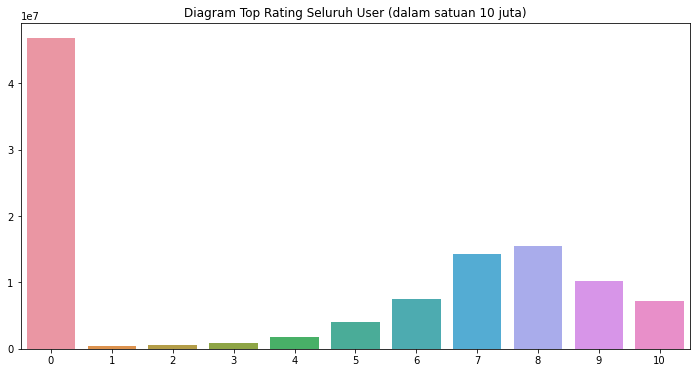

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x = list(total_rating_user.keys()),
            y = list(total_rating_user))
plt.title("Diagram Top Rating Seluruh User (dalam satuan 10 juta)")
plt.show()

In [ ]:
sorted(animelist_user.watching_status.unique())

[0, 1, 2, 3, 4, 5, 6, 33, 55]

watching status hanya bernilai 0, 1, 2, 3, 4, 6.
Maka nilai 5, 33, 55 merupakan error, jadi perlu dihapus

In [ ]:
animelist_user.drop(animelist_user[animelist_user.watching_status == 5].index, inplace=True)
animelist_user.drop(animelist_user[animelist_user.watching_status == 33].index, inplace=True)
animelist_user.drop(animelist_user[animelist_user.watching_status == 55].index, inplace=True)

In [ ]:
# top watching status
total_watching_status_user = animelist_user.watching_status.value_counts()
pd.DataFrame({
    "Watching Status": list(total_watching_status_user.keys()),
    "Total": list(total_watching_status_user)
})

,Watching Status,Total
0,2,68089751
1,6,27938693
2,1,5228658
3,4,4266591
4,3,3700514
5,0,531


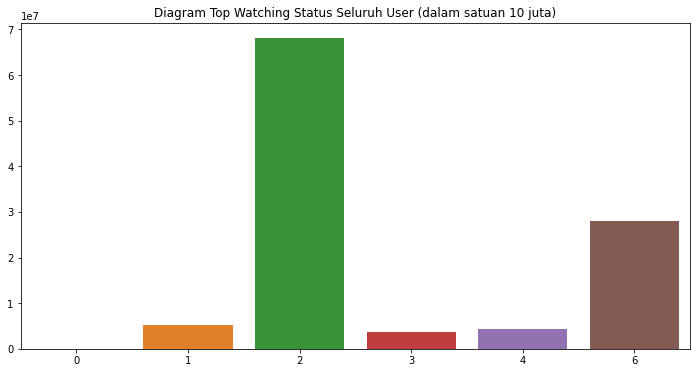

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x = list(total_watching_status_user.keys()),
            y = list(total_watching_status_user))
plt.title("Diagram Top Watching Status Seluruh User (dalam satuan 10 juta)")
plt.show()

### Analisis data pada rating_complete.csv

This dataset only considers animes that the user has watched completely (watching_status==2) and gave it a score (score!=0)

In [ ]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57633278 entries, 0 to 57633277
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 1.3 GB


cek data null

In [ ]:
rating.isnull().sum()

user_id     0
anime_id    0
rating      0
dtype: int64

cek ducplicated data

In [ ]:
rating.duplicated().sum()

0

In [ ]:
print("Jumlah aktivitas user terhadap anime:", len(rating.user_id.unique()))
print("Jumlah anime:", len(rating.anime_id.unique()))

Jumlah aktivitas user terhadap anime: 310059
Jumlah anime: 16872


In [ ]:
# top rating
total_rating_complete_user = rating.rating.value_counts()
pd.DataFrame({
    "Rating": list(total_rating_complete_user.keys()),
    "Total": list(total_rating_complete_user)
})

,Rating,Total
0,8,14642156
1,7,13325549
2,9,9773857
3,6,6849293
4,10,6716048
5,5,3436250
6,4,1455102
7,3,696048
8,2,405556
9,1,333419


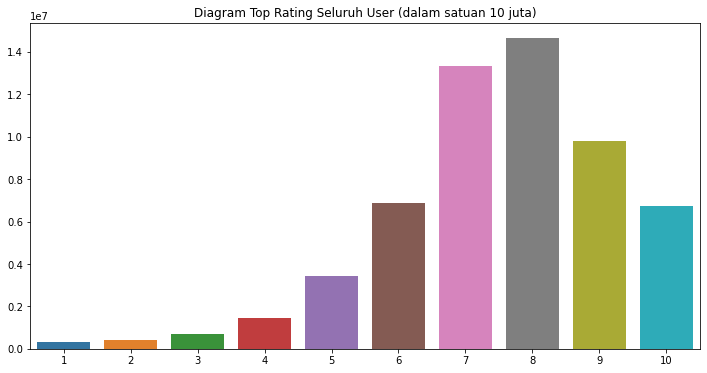

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x = list(total_rating_complete_user.keys()),
            y = list(total_rating_complete_user))
plt.title("Diagram Top Rating Seluruh User (dalam satuan 10 juta)")
plt.show()

### Analisis data pada watching_status.csv

In [ ]:
status.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   status        5 non-null      int64 
 1    description  5 non-null      object
dtypes: int64(1), object(1)
memory usage: 208.0+ bytes


In [ ]:
status

,status,description
0,1,Currently Watching
1,2,Completed
2,3,On Hold
3,4,Dropped
4,6,Plan to Watch


# Data Preparation

Memilih data yang akan digunakan

In [ ]:
df_anime = anime[["MAL_ID", "Name", "Score", "Genres", "Premiered"]]
df_anime.columns = ['anime_id', 'name', 'score', 'genres', 'premiered']

df_rating = rating

In [ ]:
df_anime.head()

,anime_id,name,score,genres,premiered
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Spring 1998
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Unknown
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Spring 1998
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Summer 2002
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Fall 2004


In [ ]:
df_rating.head()

,user_id,anime_id,rating
0,0,430,9
1,0,1004,5
2,0,3010,7
3,0,570,7
4,0,2762,9


In [ ]:
print("Jumlah anime yang digunakan:", len(df_rating.anime_id.unique()))
print("Jumlah user yang digunakan:", len(df_rating.user_id.unique()))
print("Jumlah rating user yang digunakan:", len(df_rating))

Jumlah anime yang digunakan: 16872
Jumlah user yang digunakan: 310059
Jumlah rating user yang digunakan: 57633278


karena data terlalu besar, training model dilakukan hanya mengambil data sebanyak 1000 user saja

In [ ]:
user_ids = np.array(df_rating.user_id.unique().tolist())

np.random.seed(42)
np.random.shuffle(user_ids)
user_ids = user_ids[:1000]

df_rating = df_rating[df_rating.user_id.isin(user_ids)]

In [ ]:
print("Jumlah anime yang digunakan:", len(df_rating.anime_id.unique()))
print("Jumlah user yang digunakan:", len(df_rating.user_id.unique()))
print("Jumlah rating user yang digunakan:", len(df_rating))

Jumlah anime yang digunakan: 8799
Jumlah user yang digunakan: 1000
Jumlah rating user yang digunakan: 185054


cek data hubungan anime dengan rating, apakah semua rating anime memiliki detail anime

In [ ]:
df_merge = pd.merge(df_rating, df_anime[['anime_id', 'name']], on='anime_id', how='left')
df_merge.head()

,user_id,anime_id,rating,name
0,147,14093,10,Pokemon Best Wishes! Season 2
1,147,9107,10,Pokemon Best Wishes!
2,147,28299,8,Ookami Shoujo to Kuro Ouji: Gishinanki – Happe...
3,147,23673,4,Ookami Shoujo to Kuro Ouji
4,147,12355,10,Ookami Kodomo no Ame to Yuki


In [ ]:
df_merge.isna().sum()

user_id     0
anime_id    0
rating      0
name        0
dtype: int64

cek data hubungan anime dengan rating, apakah semua detail anime memiliki rating

In [ ]:
df_merge2 = pd.merge(df_anime[['anime_id', 'name']], df_rating, on='anime_id', how='left')
df_merge2.head()

,anime_id,name,user_id,rating
0,1,Cowboy Bebop,147.0,8.0
1,1,Cowboy Bebop,435.0,9.0
2,1,Cowboy Bebop,1105.0,9.0
3,1,Cowboy Bebop,6632.0,6.0
4,1,Cowboy Bebop,6789.0,8.0


In [ ]:
df_merge2.isna().sum()

anime_id       0
name           0
user_id     8763
rating      8763
dtype: int64

terdapat 8763 data detail anime yang tidak memiliki rating

In [ ]:
unused_anime_id = df_merge2[df_merge2.rating.isna()].anime_id.unique().tolist()

df_anime = df_anime[~(df_anime.anime_id.isin(unused_anime_id))]
print("Jumlah detail anime yang digunakan:", len(df_anime.anime_id.unique()))

Jumlah detail anime yang digunakan: 8799


save final data

In [ ]:
df_rating.to_csv('final_rating.csv', index=False)
df_anime.to_csv('final_anime.csv', index=False)

load final data

In [2]:
df_rating = pd.read_csv('final_rating.csv')
df_anime = pd.read_csv('final_anime.csv')

In [3]:
df_rating

,user_id,anime_id,rating
0,147,14093,10
1,147,9107,10
2,147,28299,8
3,147,23673,4
4,147,12355,10
...,...,...,...
185049,352965,8630,8
185050,352965,17549,8
185051,352965,19221,8
185052,352965,13759,9


encoding data

In [4]:
# Mengubah user_id menjadi list tanpa nilai yang sama
user_ids = df_rating['user_id'].unique().tolist()
 
# Melakukan encoding user_id
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
 
# Melakukan proses encoding angka ke ke user_id
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}

In [5]:
# Mengubah anime_id menjadi list tanpa nilai yang sama
anime_ids = df_rating['anime_id'].unique().tolist()
 
# Melakukan proses encoding anime_id
anime_to_anime_encoded = {x: i for i, x in enumerate(anime_ids)}
 
# Melakukan proses encoding angka ke anime_id
anime_encoded_to_anime = {i: x for i, x in enumerate(anime_ids)}

In [6]:
# Mapping user_id ke dataframe user
df_rating['user'] = df_rating['user_id'].map(user_to_user_encoded)
 
# Mapping anime_id ke dataframe anime
df_rating['anime'] = df_rating['anime_id'].map(anime_to_anime_encoded)

In [7]:
# Mendapatkan jumlah user
num_users = len(user_to_user_encoded)
print(num_users)
 
# Mendapatkan jumlah anime
num_anime = len(anime_encoded_to_anime)
print(num_anime)
 
# Mengubah rating menjadi nilai float
df_rating['rating'] = df_rating['rating'].values.astype(np.float32)
 
# Nilai minimum rating
min_rating = min(df_rating['rating'])
 
# Nilai maksimal rating
max_rating = max(df_rating['rating'])
 
print('Number of User: {}, Number of Anime: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_anime, min_rating, max_rating
))

1000
8799
Number of User: 1000, Number of Anime: 8799, Min Rating: 1.0, Max Rating: 10.0


In [8]:
# Mengacak dataset
df_rating = df_rating.sample(frac=1, random_state=42)
df_rating

,user_id,anime_id,rating,user,anime
138194,273551,33023,10.0,780,1512
181703,347346,9907,10.0,973,2723
142278,277840,482,5.0,796,2042
158594,316982,14117,7.0,896,4409
135400,264929,20159,8.0,756,767
...,...,...,...,...,...
119879,235398,20899,8.0,672,494
103694,202232,1117,7.0,575,85
131932,262563,33161,7.0,745,2285
146867,287737,28619,6.0,824,1489


splitting data

In [9]:
# Membuat variabel x untuk mencocokkan data user_id dan anime_id menjadi satu value
x = df_rating[['user', 'anime']].values
 
# Membuat variabel y untuk membuat rating dari hasil 
y = df_rating['rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values
 
# Membagi menjadi 90% data train dan 10% data validasi
train_indices = int(0.9 * df_rating.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

print(x[:10], y[:10])

[[ 780 1512]
 [ 973 2723]
 [ 796 2042]
 [ 896 4409]
 [ 756  767]
 [ 469 1718]
 [ 358 1150]
 [ 822 1473]
 [ 444  615]
 [ 314  482]] [1.         1.         0.44444444 0.66666667 0.77777778 0.66666667
 0.55555556 0.66666667 0.77777778 1.        ]


In [10]:
print(f'Total # of sample in whole dataset: {len(x)}')
print(f'Total # of sample in train dataset: {len(x_train)}')
print(f'Total # of sample in test dataset: {len(x_val)}')

Total # of sample in whole dataset: 185054
Total # of sample in train dataset: 166548
Total # of sample in test dataset: 18506


# Model Development

In [11]:
class RecommenderNet(tf.keras.Model):
 
  # Insialisasi fungsi
  def __init__(self, num_users, num_anime, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_anime = num_anime
    self.embedding_size = embedding_size
    self.user_embedding = tf.keras.layers.Embedding( # layer embedding user
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = tf.keras.regularizers.l2(1e-6)
    )
    self.user_bias = tf.keras.layers.Embedding(num_users, 1) # layer embedding user bias
    self.anime_embedding = tf.keras.layers.Embedding( # layer embeddings anime
        num_anime,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = tf.keras.regularizers.l2(1e-6)
    )
    self.anime_bias = tf.keras.layers.Embedding(num_anime, 1) # layer embedding anime bias
    self.dense1 = tf.keras.layers.Dense(32, activation=tf.nn.relu) # layer dense
    self.dense2 = tf.keras.layers.Dense(1, activation=tf.nn.sigmoid) # layer output activation sigmoid
 
  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) # memanggil layer embedding 1
    user_bias = self.user_bias(inputs[:, 0]) # memanggil layer embedding 2
    anime_vector = self.anime_embedding(inputs[:, 1]) # memanggil layer embedding 3
    anime_bias = self.anime_bias(inputs[:, 1]) # memanggil layer embedding 4
 
    dot_user_anime = tf.tensordot(user_vector, anime_vector, 2) 
 
    x = dot_user_anime + user_bias + anime_bias
    x = self.dense1(x)
    x = self.dense2(x)
    return x

In [12]:
def create_model(optimizer, embedding_size):
    tf_model = RecommenderNet(num_users, num_anime, embedding_size)
    tf_model.compile(
        loss = tf.keras.losses.BinaryCrossentropy(),
        optimizer = optimizer,
        metrics=[tf.keras.metrics.RootMeanSquaredError()]
    )
    return tf_model

In [13]:
# Memulai training
import warnings
warnings.filterwarnings('ignore')

In [22]:
model_params = {
    'optimizer': ['Adam', 'RMSprop'],
    'embedding_size': [50, 100]
}

model = {}
history = {}
params = {}

print("Training Parameter: ", model_params)

k = 1
for i in range(2):
    for j in range(2):
        opt = model_params['optimizer'][i]
        emb_size = model_params['embedding_size'][j]

        print("Start Training with optimizer: {} embedding_size: {}".format(opt, emb_size))
        model["model_"+str(k)] = create_model(
            optimizer=opt,
            embedding_size=emb_size,
        )

        history["model_"+str(k)] = model["model_"+str(k)].fit(
            x = x_train,
            y = y_train,
            batch_size = 64,
            epochs = 30,
            validation_data = (x_val, y_val)
        )

        params["model_"+str(k)] = "opt: {}, emb_size: {}".format(opt, emb_size)
        k = k + 1

print("Finish Training")

Training Parameter:  {'optimizer': ['Adam', 'RMSprop'], 'embedding_size': [50, 100]}
Start Training with optimizer: Adam embedding_size: 50
Epoch 1/30
2603/2603 [==============================] - 12s 4ms/step - loss: 0.5662 - root_mean_squared_error: 0.1665 - val_loss: 0.5597 - val_root_mean_squared_error: 0.1573
Epoch 2/30
2603/2603 [==============================] - 11s 4ms/step - loss: 0.5580 - root_mean_squared_error: 0.1561 - val_loss: 0.5547 - val_root_mean_squared_error: 0.1510
Epoch 3/30
2603/2603 [==============================] - 11s 4ms/step - loss: 0.5531 - root_mean_squared_error: 0.1500 - val_loss: 0.5519 - val_root_mean_squared_error: 0.1472
Epoch 4/30
2603/2603 [==============================] - 13s 5ms/step - loss: 0.5514 - root_mean_squared_error: 0.1475 - val_loss: 0.5507 - val_root_mean_squared_error: 0.1455
Epoch 5/30
2603/2603 [==============================] - 11s 4ms/step - loss: 0.5505 - root_mean_squared_error: 0.1460 - val_loss: 0.5498 - val_root_mean_squared

# Evaluation

In [23]:
print("Modelname -- Parameter")
for k, v in params.items():
  print("{} -- {}".format(k, v))

Modelname -- Parameter
model_1 -- opt: Adam, emb_size: 50
model_2 -- opt: Adam, emb_size: 100
model_3 -- opt: RMSprop, emb_size: 50
model_4 -- opt: RMSprop, emb_size: 100


## Plot History Setiap Model

In [26]:
list_modelnames = list(history.keys())

dict_acc = {}
dict_val_acc = {}
dict_loss = {}
dict_val_loss = {}

for modelname, modelhistory in history.items():
  dict_acc[modelname] = modelhistory.history['root_mean_squared_error']
  dict_val_acc[modelname] = modelhistory.history['val_root_mean_squared_error']
  dict_loss[modelname] = modelhistory.history['loss']
  dict_val_loss[modelname] = modelhistory.history['val_loss']

label_plot = list_modelnames
marker_plot = ['o','x','v','^']

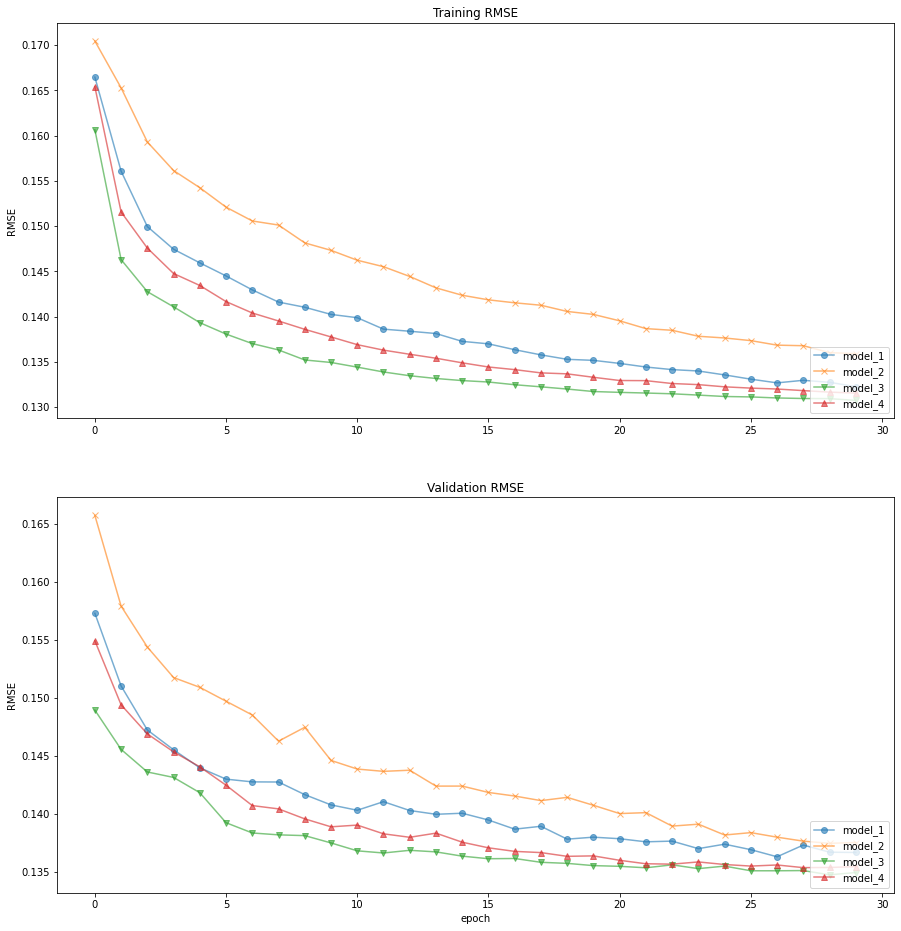

In [28]:
plt.figure(figsize=(15, 16))
plt.subplot(2, 1, 1)
for i in range(len(list_modelnames)):
  plt.plot(dict_acc[list_modelnames[i]], label=label_plot[i], marker=marker_plot[i], markersize=6, alpha=0.6)

plt.legend(loc='lower right')
plt.ylabel('RMSE')
plt.title('Training RMSE')

plt.subplot(2, 1, 2)
for i in range(len(list_modelnames)):
  plt.plot(dict_val_acc[list_modelnames[i]], label=label_plot[i], marker=marker_plot[i], markersize=6, alpha=0.6)

plt.legend(loc='lower right')
plt.ylabel('RMSE')
plt.title('Validation RMSE')
plt.xlabel('epoch')
plt.savefig('acc_all_model.png')

plt.show()

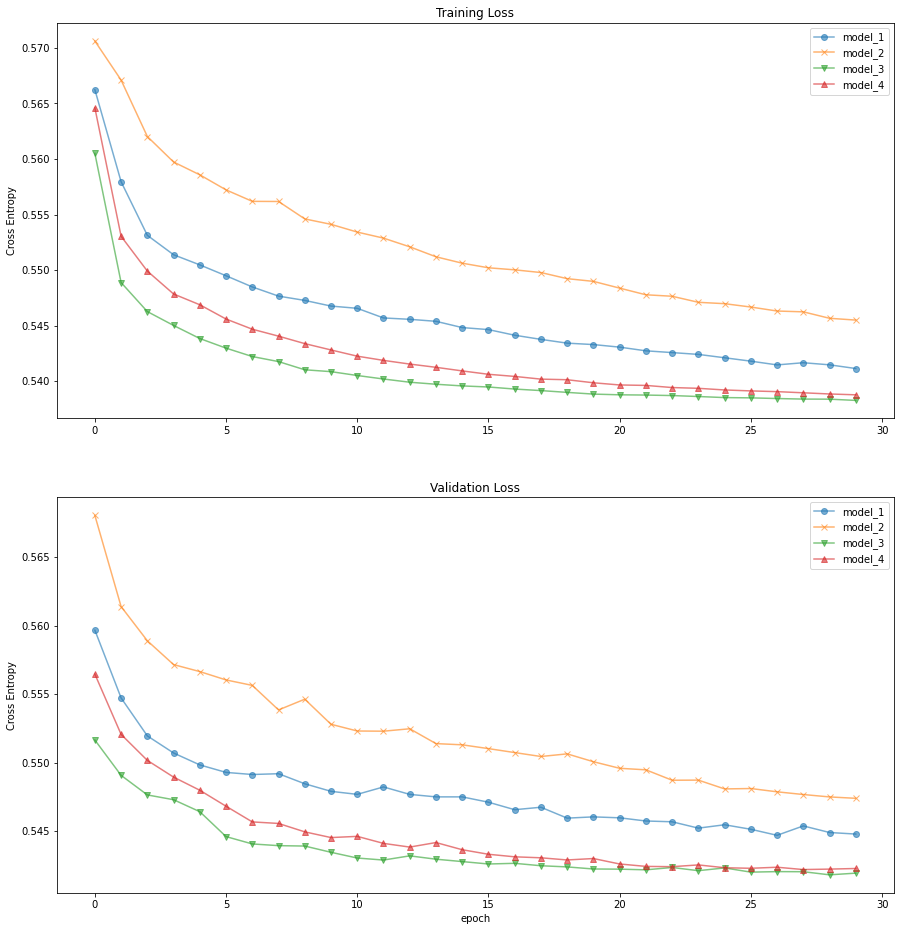

In [31]:
plt.figure(figsize=(15, 16))
plt.subplot(2, 1, 1)

for i in range(len(list_modelnames)):
  plt.plot(dict_loss[list_modelnames[i]], label=label_plot[i], marker=marker_plot[i], markersize=6, alpha=0.6)

plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.title('Training Loss')

plt.subplot(2, 1, 2)

for i in range(len(list_modelnames)):
  plt.plot(dict_val_loss[list_modelnames[i]], label=label_plot[i], marker=marker_plot[i], markersize=6, alpha=0.6)
  
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.title('Validation Loss')
plt.xlabel('epoch')

plt.savefig('loss_all_model.png')

plt.show()


## Membandingkan Metrik Evaluasi Setiap Model

In [32]:
# evaluate all model
dict_score_train = {}
dict_score_valid = {}

for modelname, modelresult in model.items():
  dict_score_train[modelname] = modelresult.evaluate(x_train, y_train)
  dict_score_valid[modelname] = modelresult.evaluate(x_val, y_val)

579/579 [==============================] - 2s 3ms/step - loss: 0.5421 - root_mean_squared_error: 0.1351


In [51]:
# prepare data before plot
df1 = pd.DataFrame({
    'Model': list_modelnames,
    'Train': [eval[1] for eval in dict_score_train.values()],
    'Valid': [eval[1] for eval in dict_score_valid.values()],
})

df2 = pd.DataFrame({
    'Model': list_modelnames,
    'Train': [eval[0] for eval in dict_score_train.values()],
    'Valid': [eval[0] for eval in dict_score_valid.values()],
})

tidy1 = df1.melt(id_vars='Model').rename(columns=str.title)

tidy2 = df2.melt(id_vars='Model').rename(columns=str.title)

In [52]:
df2

,Model,Train,Valid
0,model_1,0.539409,0.543707
1,model_2,0.543194,0.546411
2,model_3,0.537852,0.541684
3,model_4,0.538575,0.542054


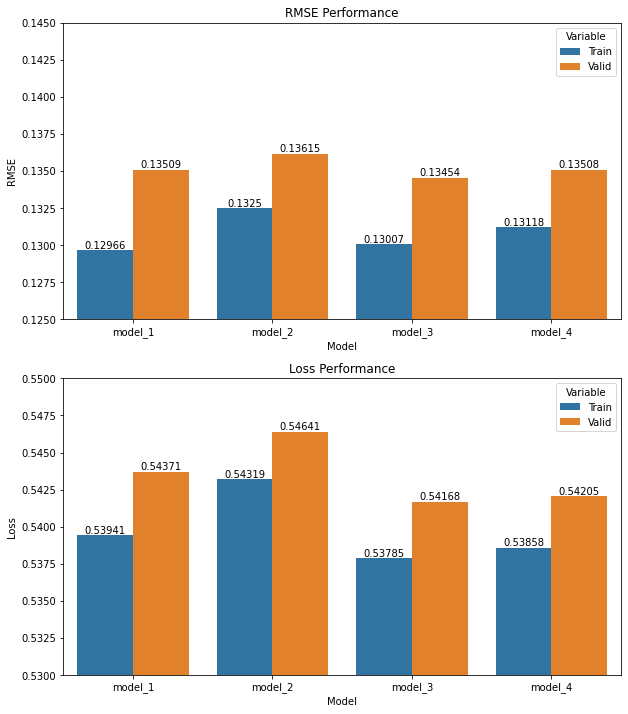

In [53]:
# plot comparison all models evaluate
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

# first plot
sns.barplot(x='Model', y='Value', hue='Variable', data=tidy1, ax=ax1)
ax1.set_ylabel('RMSE')
ax1.set_ylim([0.125, 0.145])
ax1.set_title('RMSE Performance')

for p, data in zip(ax1.patches, tidy1['Value']):
    ax1.annotate(round(data, 5), xy=(p.get_x()+p.get_width()/2, p.get_height()),
                ha='center', va='bottom')

# second plot
sns.barplot(x='Model', y='Value', hue='Variable', data=tidy2, ax=ax2)
ax2.set_ylabel('Loss')
ax2.set_ylim([0.53, 0.55])
ax2.set_title('Loss Performance')

for p, data in zip(ax2.patches, tidy2['Value']):
    ax2.annotate(round(data, 5), xy=(p.get_x()+p.get_width()/2, p.get_height()),
                ha='center', va='bottom')

plt.savefig('evaluate_all_model.png')
plt.show()

model_3 (opt: RMSprop, emb_size: 50) dipilih karena memiliki tingkat RMSE paling rendah dan loss relatif rendah

## Mengambil Rekomendasi Satu User

In [55]:
# Mengambil sample user
user_id = df_rating.user_id.sample(1).iloc[0]
anime_watched_by_user = df_rating[df_rating.user_id == user_id]
 
anime_not_watched = df_anime[~df_anime['anime_id'].isin(anime_watched_by_user.anime_id.values)]['anime_id'] 
anime_not_watched = list(
    set(anime_not_watched)
    .intersection(set(anime_to_anime_encoded.keys()))
)
 
anime_not_watched = [[anime_to_anime_encoded.get(x)] for x in anime_not_watched]
user_encoder = user_to_user_encoded.get(user_id)
user_anime_array = np.hstack(
    ([[user_encoder]] * len(anime_not_watched), anime_not_watched)
)

In [56]:
ratings_predict = model["model_3"].predict(user_anime_array).flatten()
 
top_ratings_indices = ratings_predict.argsort()[-10:][::-1]
recommended_anime_ids = [
    anime_encoded_to_anime.get(anime_not_watched[x][0]) for x in top_ratings_indices
]
 
print('Showing recommendations for users: {}'.format(user_id))
print('====' * 10)
print('Top 10 anime with high ratings from user')
print('----' * 10)
 
top_anime_user = (
    anime_watched_by_user.sort_values(
        by = 'rating',
        ascending=False
    )
    .head(10)
    .anime_id.values
)
 
df_anime_rows = df_anime[df_anime['anime_id'].isin(top_anime_user)]
for row in df_anime_rows.itertuples():
    print("{} ({}) : {}".format(row.name, row.premiered, row.genres))
 
print('----' * 10)
print('Top 10 anime recommendation')
print('----' * 10)
 
recommended_anime = df_anime[df_anime['anime_id'].isin(recommended_anime_ids)]
for row in recommended_anime.itertuples():
    print("{} ({}) : {}".format(row.name, row.premiered, row.genres))

270/270 [==============================] - 1s 2ms/step
Showing recommendations for users: 176527
Top 10 anime with high ratings from user
----------------------------------------
Higashi no Eden (Spring 2009) : Action, Sci-Fi, Mystery, Drama, Romance, Thriller
Toaru Kagaku no Railgun (Fall 2009) : Action, Sci-Fi, Super Power
Deadman Wonderland (Spring 2011) : Action, Horror, Sci-Fi, Shounen, Supernatural
Kaichou wa Maid-sama! (Spring 2010) : Comedy, Romance, School, Shoujo
Shiki (Summer 2010) : Horror, Mystery, Supernatural, Thriller, Vampire
Mondaiji-tachi ga Isekai kara Kuru Sou Desu yo? (Winter 2013) : Action, Comedy, Fantasy, Supernatural
Gokukoku no Brynhildr (Spring 2014) : Drama, Mystery, Sci-Fi, Seinen
Tokyo Ghoul (Summer 2014) : Action, Mystery, Horror, Psychological, Supernatural, Drama, Seinen
Aldnoah.Zero 2nd Season (Winter 2015) : Action, Mecha, Sci-Fi, Space
Ajin 2nd Season (Fall 2016) : Action, Horror, Mystery, Seinen, Supernatural
---------------------------------------

In [57]:
print("anime with high ratings from user")
df_anime_rows

anime with high ratings from user


,anime_id,name,score,genres,premiered
3276,5630,Higashi no Eden,7.83,"Action, Sci-Fi, Mystery, Drama, Romance, Thriller",Spring 2009
3441,6213,Toaru Kagaku no Railgun,7.72,"Action, Sci-Fi, Super Power",Fall 2009
3624,6880,Deadman Wonderland,7.22,"Action, Horror, Sci-Fi, Shounen, Supernatural",Spring 2011
3685,7054,Kaichou wa Maid-sama!,8.06,"Comedy, Romance, School, Shoujo",Spring 2010
3828,7724,Shiki,7.79,"Horror, Mystery, Supernatural, Thriller, Vampire",Summer 2010
5162,15315,Mondaiji-tachi ga Isekai kara Kuru Sou Desu yo?,7.56,"Action, Comedy, Fantasy, Supernatural",Winter 2013
5786,21431,Gokukoku no Brynhildr,6.92,"Drama, Mystery, Sci-Fi, Seinen",Spring 2014
5886,22319,Tokyo Ghoul,7.81,"Action, Mystery, Horror, Psychological, Supern...",Summer 2014
6240,27655,Aldnoah.Zero 2nd Season,6.98,"Action, Mecha, Sci-Fi, Space",Winter 2015
7124,33253,Ajin 2nd Season,7.68,"Action, Horror, Mystery, Seinen, Supernatural",Fall 2016


In [58]:
print("Top 10 anime recommendation")
recommended_anime

Top 10 anime recommendation


,anime_id,name,score,genres,premiered
413,457,Mushishi,8.69,"Adventure, Slice of Life, Mystery, Historical,...",Fall 2005
708,820,Ginga Eiyuu Densetsu,9.07,"Military, Sci-Fi, Space, Drama",Unknown
2852,4181,Clannad: After Story,8.96,"Slice of Life, Comedy, Supernatural, Drama, Ro...",Fall 2008
3122,5114,Fullmetal Alchemist: Brotherhood,9.19,"Action, Military, Adventure, Comedy, Drama, Ma...",Spring 2009
4308,9969,Gintama',9.08,"Action, Sci-Fi, Comedy, Historical, Parody, Sa...",Spring 2011
4622,11061,Hunter x Hunter (2011),9.1,"Action, Adventure, Fantasy, Shounen, Super Power",Fall 2011
5165,15335,Gintama Movie 2: Kanketsu-hen - Yorozuya yo Ei...,8.96,"Action, Sci-Fi, Comedy, Historical, Parody, Sa...",Unknown
5173,15417,Gintama': Enchousen,9.04,"Action, Comedy, Historical, Parody, Samurai, S...",Fall 2012
6375,28977,Gintama°,9.1,"Action, Comedy, Historical, Parody, Samurai, S...",Spring 2015
8286,38524,Shingeki no Kyojin Season 3 Part 2,9.1,"Action, Drama, Fantasy, Military, Mystery, Sho...",Spring 2019


Top genres user likes and recommendation

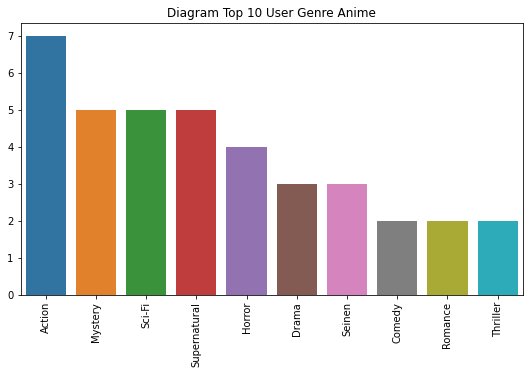

In [62]:
user_genres = []
list_anime_genres = df_anime_rows.genres.unique()

for i, v in enumerate(list_anime_genres):
  user_genres.extend(v.split(', '))

user_genres = sorted(set(user_genres))

total_genre_by_user = {g: 0 for g in user_genres}

for anime_genre in df_anime_rows['genres']:
  list_anime_genre = anime_genre.split(', ')
  for genre in list_anime_genre:
    total_genre_by_user[genre] = total_genre_by_user[genre] + 1

total_genre_by_user = dict(sorted(total_genre_by_user.items(), key=lambda x:x[1], reverse=True))

plt.figure(figsize=(9,5))
sns.barplot(x = list(total_genre_by_user.keys())[:10],
            y = list(total_genre_by_user.values())[:10],
            )
plt.xticks(rotation=90)
plt.title("Diagram Top 10 User Genre Anime")
plt.show()

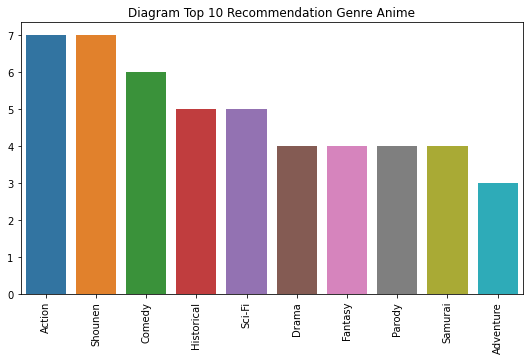

In [64]:
recommended_genres = []
list_anime_genres = recommended_anime.genres.unique()

for i, v in enumerate(list_anime_genres):
  recommended_genres.extend(v.split(', '))

recommended_genres = sorted(set(recommended_genres))

total_genre_by_recommendation = {g: 0 for g in recommended_genres}

for anime_genre in recommended_anime['genres']:
  list_anime_genre = anime_genre.split(', ')
  for genre in list_anime_genre:
    total_genre_by_recommendation[genre] = total_genre_by_recommendation[genre] + 1

total_genre_by_recommendation = dict(sorted(total_genre_by_recommendation.items(), key=lambda x:x[1], reverse=True))

plt.figure(figsize=(9,5))
sns.barplot(x = list(total_genre_by_recommendation.keys())[:10],
            y = list(total_genre_by_recommendation.values())[:10],
            )
plt.xticks(rotation=90)
plt.title("Diagram Top 10 Recommendation Genre Anime")
plt.show()